# Regresión logística para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/bank/bank.csv",sep=";")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.shape

(4119, 21)

In [5]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [6]:
data["y"] = (data["y"] == "yes").astype(int)

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [8]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [9]:
data.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,0
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,0
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0


In [10]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [11]:
data["education"] = np.where(data["education"] == "basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.9y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "high.school", "High School", data["education"])
data["education"] = np.where(data["education"] == "university.degree", "University Degree", data["education"])
data["education"] = np.where(data["education"] == "professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"] == "illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"] == "unknown", "Unknown", data["education"])


In [12]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [13]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [14]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [15]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra')

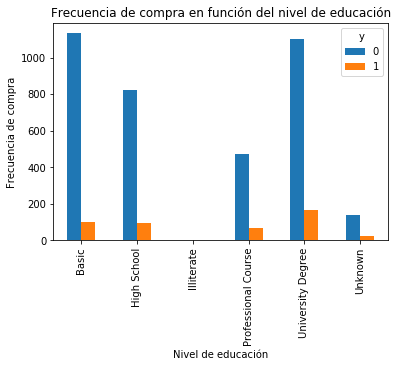

In [16]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra")

Text(0, 0.5, 'Proporción de clientes')

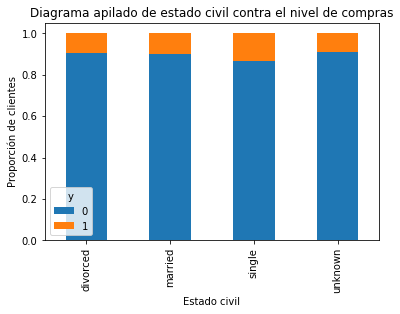

In [17]:
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de compra')

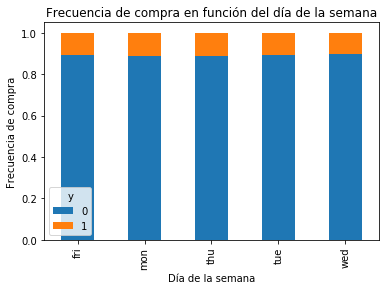

In [18]:
table=pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra")

Text(0, 0.5, 'Frecuencia de compra')

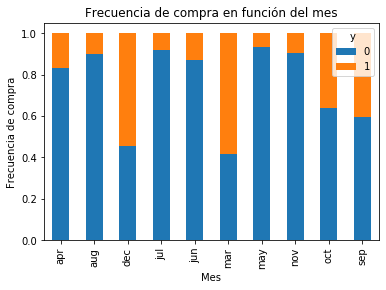

In [19]:
table=pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia de compra")

Text(0, 0.5, 'Frecuencia de compra')

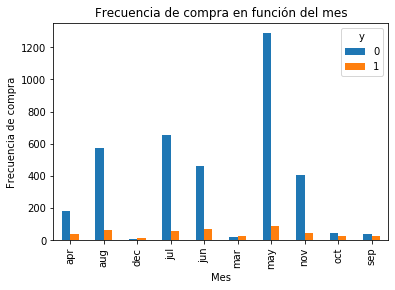

In [20]:
pd.crosstab(data.month, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia de compra")

Text(0, 0.5, 'Cliente')

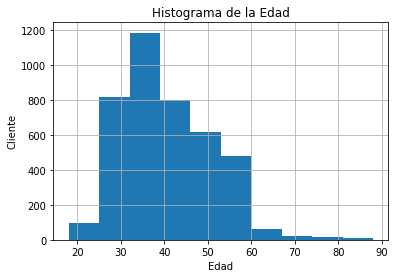

In [21]:
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

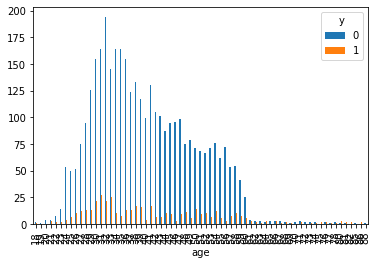

In [22]:
pd.crosstab(data.age, data.y).plot(kind="bar")

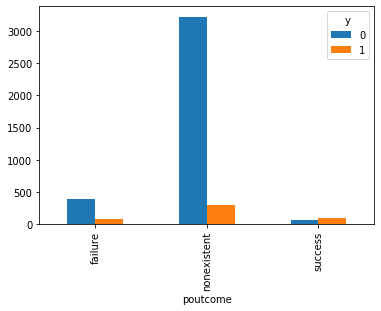

In [23]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

### Conversión de las variables categóricas a dummies

In [24]:
categories = ["job", "marital", "education", "default", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]

In [25]:
for category in categories:
    cat_list = "cat_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=cat_list)
    data = data.join(cat_dummies)

In [26]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cat_month_oct,cat_month_sep,cat_day_of_week_fri,cat_day_of_week_mon,cat_day_of_week_thu,cat_day_of_week_tue,cat_day_of_week_wed,cat_poutcome_failure,cat_poutcome_nonexistent,cat_poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,0,0,1,0,0,0,0,0,1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,0,0,1,0,0,0,0,0,1,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,0,1,0,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,0,0,1,0


In [27]:
data.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'cat_job_admin.',
       'cat_job_blue-collar', 'cat_job_entrepreneur', 'cat_job_housemaid',
       'cat_job_management', 'cat_job_retired', 'cat_job_self-employed',
       'cat_job_services', 'cat_job_student', 'cat_job_technician',
       'cat_job_unemployed', 'cat_job_unknown', 'cat_marital_divorced',
       'cat_marital_married', 'cat_marital_single', 'cat_marital_unknown',
       'cat_education_Basic', 'cat_education_High School',
       'cat_education_Illiterate', 'cat_education_Professional Course',
       'cat_education_University Degree', 'cat_education_Unknown',
       'cat_default_no', 'cat_default_unknown', 'cat_default_yes',
       'cat_housing_no', 'cat_housing_unknown', 'cat_housing_yes',
       'cat_loa

In [28]:
data_vars = data.columns.values.tolist()
to_keep = [v for v in data_vars if v not in categories]

In [29]:
to_keep

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'cat_job_admin.',
 'cat_job_blue-collar',
 'cat_job_entrepreneur',
 'cat_job_housemaid',
 'cat_job_management',
 'cat_job_retired',
 'cat_job_self-employed',
 'cat_job_services',
 'cat_job_student',
 'cat_job_technician',
 'cat_job_unemployed',
 'cat_job_unknown',
 'cat_marital_divorced',
 'cat_marital_married',
 'cat_marital_single',
 'cat_marital_unknown',
 'cat_education_Basic',
 'cat_education_High School',
 'cat_education_Illiterate',
 'cat_education_Professional Course',
 'cat_education_University Degree',
 'cat_education_Unknown',
 'cat_default_no',
 'cat_default_unknown',
 'cat_default_yes',
 'cat_housing_no',
 'cat_housing_unknown',
 'cat_housing_yes',
 'cat_loan_no',
 'cat_loan_unknown',
 'cat_loan_yes',
 'cat_contact_cellular',
 'cat_contact_telephone',
 'cat_month_apr',
 'cat_month_aug',
 'cat_month_dec',
 'cat_month_jul',
 'cat

In [30]:
bank_data = data[to_keep]
bank_data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'cat_job_admin.', 'cat_job_blue-collar', 'cat_job_entrepreneur',
       'cat_job_housemaid', 'cat_job_management', 'cat_job_retired',
       'cat_job_self-employed', 'cat_job_services', 'cat_job_student',
       'cat_job_technician', 'cat_job_unemployed', 'cat_job_unknown',
       'cat_marital_divorced', 'cat_marital_married', 'cat_marital_single',
       'cat_marital_unknown', 'cat_education_Basic',
       'cat_education_High School', 'cat_education_Illiterate',
       'cat_education_Professional Course', 'cat_education_University Degree',
       'cat_education_Unknown', 'cat_default_no', 'cat_default_unknown',
       'cat_default_yes', 'cat_housing_no', 'cat_housing_unknown',
       'cat_housing_yes', 'cat_loan_no', 'cat_loan_unknown', 'cat_loan_yes',
       'cat_contact_cellular', 'cat_contact_telephone', 'cat_month_apr',
      

In [31]:
bank_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,cat_month_oct,cat_month_sep,cat_day_of_week_fri,cat_day_of_week_mon,cat_day_of_week_thu,cat_day_of_week_tue,cat_day_of_week_wed,cat_poutcome_failure,cat_poutcome_nonexistent,cat_poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


In [32]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

### Selección de rasgos para el modelo


In [33]:
n = 12

In [34]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [83]:
lr = LogisticRegression(solver='liblinear')

In [84]:
rfe = RFE(lr, n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

ValueError: Must pass DataFrame with boolean values only

In [37]:
print(rfe.support_)

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True False  True False False False False False False  True False
  True]


In [38]:
print(rfe.ranking_)

[35 41 18 45  1 14 27 25  1 40 22  3  1 37  2 42  1  5 30 33 12 47 19 44
 31 50 26 13 48 21 32  8 36 34 49 20  6 10 15  9 23 16  4 39 24  1  1  1
  1  1 17  1 46 38 28 43 29 11  1  7  1]


In [39]:
z = zip(bank_data_vars, rfe.support_, rfe.ranking_)

In [40]:
list(z)

[('age', False, 35),
 ('duration', False, 41),
 ('campaign', False, 18),
 ('pdays', False, 45),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 40),
 ('y', False, 22),
 ('cat_job_admin.', False, 3),
 ('cat_job_blue-collar', True, 1),
 ('cat_job_entrepreneur', False, 37),
 ('cat_job_housemaid', False, 2),
 ('cat_job_management', False, 42),
 ('cat_job_retired', True, 1),
 ('cat_job_self-employed', False, 5),
 ('cat_job_services', False, 30),
 ('cat_job_student', False, 33),
 ('cat_job_technician', False, 12),
 ('cat_job_unemployed', False, 47),
 ('cat_job_unknown', False, 19),
 ('cat_marital_divorced', False, 44),
 ('cat_marital_married', False, 31),
 ('cat_marital_single', False, 50),
 ('cat_marital_unknown', False, 26),
 ('cat_education_Basic', False, 13),
 ('cat_education_High School', False, 48),
 ('cat_education_Illiterate', False, 21),
 ('cat_education_Professional

In [41]:
cols = ["previous", "euribor3m", "cat_job_blue-collar", "cat_job_retired", "cat_month_aug", "cat_month_dec", 
        "cat_month_jul", "cat_month_jun", "cat_month_mar", "cat_month_nov", "cat_day_of_week_wed",
       "cat_poutcome_nonexistent"]

In [42]:
X = bank_data[cols] # variables predictoras
Y = bank_data["y"] # variable a predecir

### Implementación del modelo en Python con statsmodel.api

In [43]:
import statsmodels.api as sm

In [44]:
logit_model = sm.Logit(Y, X)

In [45]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [46]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4107
Method:                           MLE   Df Model:                           11
Date:                Sun, 24 May 2020   Pseudo R-squ.:                  0.1554
Time:                        11:01:27   Log-Likelihood:                -1201.8
converged:                       True   LL-Null:                       -1422.9
Covariance Type:            nonrobust   LLR p-value:                 6.449e-88
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
previous                    -0.1229      0.070     -1.755      0.079      -0.260       0.014
euribor3m                   -0.6049      0.038    -15.788      0.000      -0.680      -0.530
cat_job_blue-collar         -0.5032      0.152     -3.314      0.001      -0.801      -0.206
cat_job_retired              0.2235      0.219      1.021      0.307      -0.206       0.653
cat_month_aug                0.6048      0.176      3.437      0.001       0.260       0.950
cat_month_dec                1.1358      0.449      2.528      0.011       0.255       2.016
cat_month_jul                1.0327      0.191      5.407      0.000       0.658       1.407
cat_month_jun                1.0775      0.175      6.149      0.000       0.734       1.421
cat_month_mar                1.6448      0.314      5.241      0.000       1.030       2.260
cat_month_nov                0.3828      0.195      1.963      0.050       0.001       0.765
cat_day_of_week_wed         -0.0649      0.139     -0.466      0.641      -0.338       0.208
cat_poutcome_nonexistent    -0.7753      0.122     -6.349      0.000      -1.015      -0.536
============================================================================================
"""

### Implementación del modelo en Python con scikit-learn

In [47]:
from sklearn import linear_model

In [82]:
logit_model = linear_model.LogisticRegression(solver='liblinear')
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
logit_model.score(X,Y)

0.8963340616654528

In [50]:
1-Y.mean() #sólo un 10,9% de la gente hace la compra del producto bancario

0.8905074047098811

In [51]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5076571354371748]
1,euribor3m,[-0.5464961328095875]
2,cat_job_blue-collar,[-0.3591553621981977]
3,cat_job_retired,[0.3560383887828734]
4,cat_month_aug,[0.625398308645033]
5,cat_month_dec,[1.1822172985997683]
6,cat_month_jul,[0.9622633627645103]
7,cat_month_jun,[1.0543179248746157]
8,cat_month_mar,[1.6306366297853532]
9,cat_month_nov,[0.4519576818260996]


## Validación del modelo logístico

In [53]:
 from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [81]:
lm = linear_model.LogisticRegression(solver='liblinear')
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
from IPython.display import display, Math, Latex

In [64]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p>0.5\end{cases}'))

<IPython.core.display.Math object>

In [57]:
probs = lm.predict_proba(X_test) # nos da la probabilidad estandar

In [58]:
probs

array([[0.95462912, 0.04537088],
       [0.83762689, 0.16237311],
       [0.93244632, 0.06755368],
       ...,
       [0.65044409, 0.34955591],
       [0.97383524, 0.02616476],
       [0.57021896, 0.42978104]])

In [61]:
prediction = lm.predict(X_test) # devuelve un array de 0,1 según la probabilidad de que se cumpla la compra o no

In [62]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p>\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [66]:
prob = probs[:, 1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.045371,0
1,0.162373,1
2,0.067554,0
3,0.062144,0
4,0.041582,0


In [67]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [69]:
390/len(prob_df) * 100

31.55339805825243

In [70]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,905
1,331


In [71]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,504
1,732


In [72]:
# Para comprobar la eficacia del modelo
from sklearn import metrics

In [73]:
metrics.accuracy_score(Y_test, prediction)

0.9004854368932039

# Validación cruzada con Python

Se divide el conjunto de datos original en K particiones. De esas K, una se usarán para conjunto de testing, el resto, conjunto de entrenamiento. Cada una de las particiones se utilizará una vez como conjunto de testing para cada una de las itereaciones.

sklearn tiene un método para hacer validaciones cruzadas.

In [74]:
from sklearn.model_selection import cross_val_score

In [85]:
k = 10
scores = cross_val_score(linear_model.LogisticRegression(solver='liblinear'), X, Y, scoring="accuracy", cv=k)

In [77]:
scores

array([0.9031477 , 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89537713, 0.88807786])

In [78]:
scores.mean()

0.8943884240990478

In [86]:
k = 12
scores = cross_val_score(linear_model.LogisticRegression(solver='liblinear'), X, Y, scoring="accuracy", cv=k)
scores.mean()

0.8951165883384306

## Matrices de confusión y curvas ROC

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [88]:
lm = linear_model.LogisticRegression(solver='liblinear')
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
probs = lm.predict_proba(X_test)

In [91]:
prob = probs[:, 1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df['prediction'] = np.where(prob_df[0]>=threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df

,0,prediction,actual
0,0.045371,0,0
1,0.162373,1,0
2,0.067554,0,0
3,0.062144,0,0
4,0.041582,0,0
...,...,...,...
1231,0.062144,0,0
1232,0.062079,0,0
1233,0.349556,1,0
1234,0.026165,0,0


In [92]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


In [93]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[0][1]
FP = confusion_matrix[1][0]

In [94]:
sens = TP/(TP+FN)
sens

0.21025641025641026

In [95]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.047281323877068515

In [117]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensibilities = [1]
especifities_1 = [1]
for t in thresholds:
    prob_df['prediction'] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(Y_test)
    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    sens = TP/(TP+FN)
    sensibilities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)
sensibilities.append(0)
especifities_1.append(0)

In [118]:
sensibilities

[1,
 0.9344262295081968,
 0.8442622950819673,
 0.680327868852459,
 0.6721311475409836,
 0.6639344262295082,
 0.6475409836065574,
 0.5163934426229508,
 0.45901639344262296,
 0.4016393442622951,
 0.36065573770491804,
 0.1721311475409836,
 0.11475409836065574,
 0]

In [119]:
especifities_1

[1,
 0.7782764811490126,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.24596050269299818,
 0.22621184919210058,
 0.12387791741472176,
 0.1077199281867145,
 0.07181328545780974,
 0.06463195691202872,
 0.02333931777378817,
 0.013464991023339312,
 0]

Text(0.5, 1.0, 'Curva ROC')

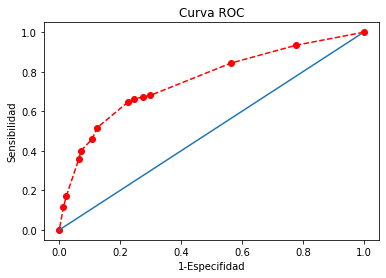

In [120]:
%matplotlib inline
plt.plot(especifities_1, sensibilities, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

### Cómo pintar curvas ROC con sklearn

In [123]:
from sklearn import metrics
from ggplot import *

In [126]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [128]:
df = pd.DataFrame({
    "x":espc_1,
    "y":sensit
})
df.head()

,x,y
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.024590
3,0.000000,0.032787
4,0.002693,0.032787


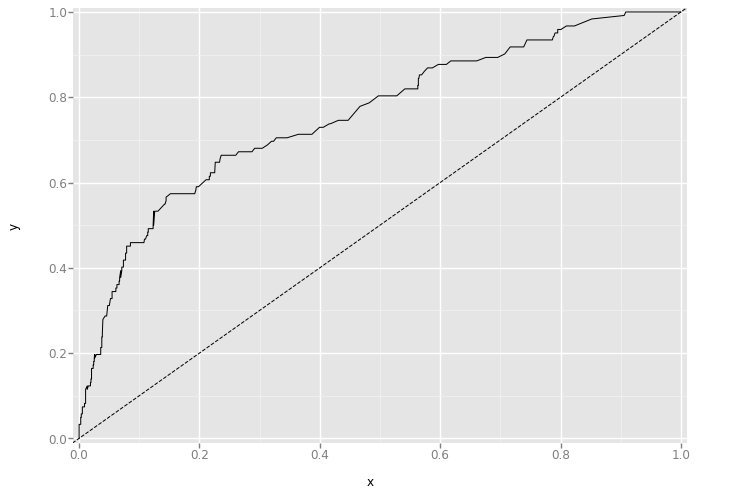

<ggplot: (7564963105)>

In [135]:
ggplot(df, aes(x="x", y="y")) + geom_line() + geom_abline(linetype="dashed") + xlim(-0.01, 1.01) + ylim(-0.01, 1.01)

In [131]:
auc = metrics.auc(espc_1, sensit)
auc

0.7575712982311564

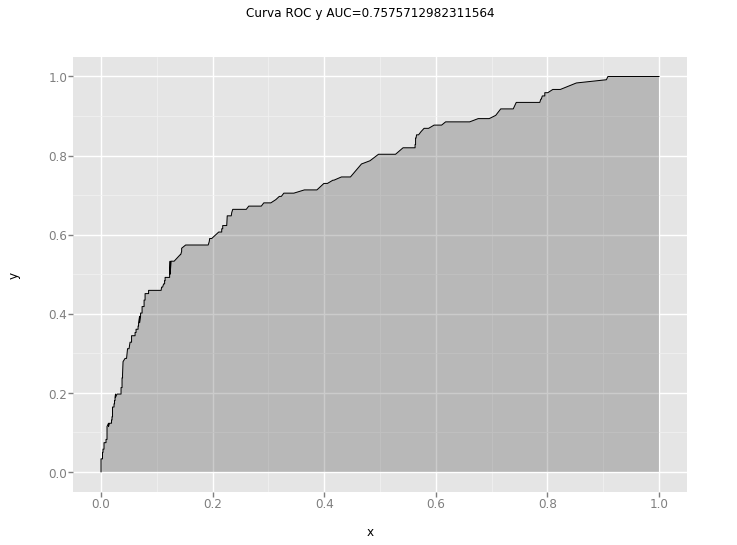

<ggplot: (7564956841)>

In [134]:
ggplot(df, aes(x="x", y="y")) + geom_area(alpha=0.25) + geom_line(aes(y="y")) + ggtitle("Curva ROC y AUC=%s" %str(auc))